In [1]:
import requests
import numpy as np
import pandas as pd
import datetime
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import pandas_datareader.data as web
%matplotlib inline

In [2]:
load_dotenv('.env')

fmp_key = os.getenv('FMP_API')

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

timeframe = "1D"

start_date = pd.Timestamp("2020-03-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-31", tz="America/New_York").isoformat()

type(fmp_key)

company = 'AMD'

In [3]:
def inc_stmt_function():
    inc_stmt = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={fmp_key}').json()

    current_inc_stmt_df = pd.DataFrame.from_dict(inc_stmt[0], orient='index')
    current_inc_stmt_df = current_inc_stmt_df[6:27]
    current_inc_stmt_df.columns = ['CY']
    current_inc_stmt_df_rev = current_inc_stmt_df.loc['revenue']
    current_inc_stmt_df['Pct of Revenue'] = current_inc_stmt_df / current_inc_stmt_df_rev
    current_inc_stmt_df['PY-1'] = pd.DataFrame.from_dict(inc_stmt[1], orient='index')
    current_inc_stmt_df['PY-2'] = pd.DataFrame.from_dict(inc_stmt[2], orient='index')
    current_inc_stmt_df['PY-3'] = pd.DataFrame.from_dict(inc_stmt[3], orient='index')
    current_inc_stmt_df['PY-4'] = pd.DataFrame.from_dict(inc_stmt[4], orient='index')
   
    complete_inc_stmt_df = current_inc_stmt_df[['PY-4', 'PY-3', 'PY-2', 'PY-1', 'CY', 'Pct of Revenue']]
    
    # pct = current_inc_stmt_df['Pct of Revenue']
    
    avg_rev_growth = ((1+(inc_stmt[0]['revenue'] - inc_stmt[1]['revenue']) / inc_stmt[1]['revenue']) * (1+(inc_stmt[1]['revenue'] - inc_stmt[2]['revenue']) / inc_stmt[2]['revenue']) * (1+(inc_stmt[2]['revenue'] - inc_stmt[3]['revenue']) / inc_stmt[3]['revenue']) * (1+(inc_stmt[3]['revenue'] - inc_stmt[4]['revenue']) / inc_stmt[4]['revenue']))**(1/4) -1

    # future_inc_stmt_fy1 = (current_inc_stmt_df['CY']['revenue'] * (1+avg_rev_growth)) * pct

    # complete_inc_stmt_df['FY+1 est'] = future_inc_stmt_fy1

    complete_inc_stmt_df['FY+1 est'] = (complete_inc_stmt_df['CY']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+2 est'] = (complete_inc_stmt_df['FY+1 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+3 est'] = (complete_inc_stmt_df['FY+2 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+4 est'] = (complete_inc_stmt_df['FY+3 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+5 est'] = (complete_inc_stmt_df['FY+4 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']

    return complete_inc_stmt_df

inc_stmt_function()

KeyError: 0

In [ ]:
def bal_sht_function():
    complete_inc_stmt_df = inc_stmt_function()    
    
    bal_sht = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={fmp_key}').json()

    current_bal_sht_df = pd.DataFrame.from_dict(bal_sht[0],orient='index')
    current_bal_sht_df = current_bal_sht_df[6:-2]
    current_bal_sht_df.columns = ['CY']
    current_bal_sht_df['Pct of Revenue'] = current_bal_sht_df / complete_inc_stmt_df['CY'].iloc[0]
    current_bal_sht_df['PY-1'] = pd.DataFrame.from_dict(bal_sht[1],orient='index')
    current_bal_sht_df['PY-2'] = pd.DataFrame.from_dict(bal_sht[2],orient='index')
    current_bal_sht_df['PY-3'] = pd.DataFrame.from_dict(bal_sht[3],orient='index')
    current_bal_sht_df['PY-4'] = pd.DataFrame.from_dict(bal_sht[4],orient='index')
    complete_bal_sht_df = current_bal_sht_df[['PY-4', 'PY-3', 'PY-2', 'PY-1', 'CY', 'Pct of Revenue']]
    complete_bal_sht_df

    complete_bal_sht_df['FY+1 est'] = complete_inc_stmt_df['FY+1 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+2 est'] = complete_inc_stmt_df['FY+2 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+3 est'] = complete_inc_stmt_df['FY+3 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+4 est'] = complete_inc_stmt_df['FY+4 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+5 est'] = complete_inc_stmt_df['FY+5 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    
    return complete_bal_sht_df
    
bal_sht_function()


C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,PY-4,PY-3,PY-2,PY-1,CY,Pct of Revenue,FY+1 est,FY+2 est,FY+3 est,FY+4 est,FY+5 est
cashAndCashEquivalents,1264000000,1185000000,1078000000,1466000000,1595000000,0.163372,1.9611e+09,2.41122e+09,2.96466e+09,3.64513e+09,4.48178e+09
shortTermInvestments,0,0,78000000,37000000,695000000,0.0711871,8.54521e+08,1.05066e+09,1.29181e+09,1.58832e+09,1.95288e+09
cashAndShortTermInvestments,1264000000,1185000000,1156000000,1503000000,2290000000,0.234559,2.81562e+09,3.46188e+09,4.25647e+09,5.23344e+09,6.43466e+09
netReceivables,311000000,454000000,1235000000,1859000000,2066000000,0.211615,2.5402e+09,3.12325e+09,3.84012e+09,4.72153e+09,5.80524e+09
inventory,751000000,694000000,845000000,982000000,1399000000,0.143296,1.72011e+09,2.11492e+09,2.60035e+09,3.1972e+09,3.93104e+09
otherCurrentAssets,109000000,301000000,304000000,253000000,388000000,0.0397419,4.77056e+08,5.86554e+08,7.21183e+08,8.86714e+08,1.09024e+09
totalCurrentAssets,2530000000,2634000000,3540000000,4597000000,6143000000,0.629212,7.55298e+09,9.2866e+09,1.14181e+10,1.40389e+10,1.72612e+10
propertyPlantEquipmentNet,164000000,261000000,348000000,500000000,641000000,0.065656,7.88127e+08,9.69023e+08,1.19144e+09,1.46491e+09,1.80114e+09
goodwill,289000000,289000000,289000000,289000000,289000000,0.0296016,3.55333e+08,4.36892e+08,5.3717e+08,6.60465e+08,8.1206e+08
intangibleAssets,232000000,239000000,226000000,210000000,0,0,0,0,0,0,0


In [ ]:
def cash_flow_forecast():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function()   

    
    projected_cf = {}

    projected_cf['FY+1 est'] = {}

    projected_cf['FY+1 est']['Net Income'] = complete_inc_stmt_df['FY+1 est']['netIncome']
    projected_cf['FY+1 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+1 est']['depreciationAndAmortization']
    projected_cf['FY+1 est']['Change in Receivables'] = complete_bal_sht_df['CY']['netReceivables'] - complete_bal_sht_df['FY+1 est']['netReceivables']
    projected_cf['FY+1 est']['Change in Inventory'] = complete_bal_sht_df['CY']['inventory'] - complete_bal_sht_df['FY+1 est']['inventory']
    projected_cf['FY+1 est']['Change in Payables'] = complete_bal_sht_df['FY+1 est']['accountPayables'] - complete_bal_sht_df['CY']['accountPayables']
    projected_cf['FY+1 est']['Change in NWC'] = projected_cf['FY+1 est']['Change in Receivables'] + projected_cf['FY+1 est']['Change in Inventory'] + projected_cf['FY+1 est']['Change in Payables']
    projected_cf['FY+1 est']['OP CF'] = projected_cf['FY+1 est']['Net Income'] + projected_cf['FY+1 est']['Depreciation & Amortization'] + projected_cf['FY+1 est']['Change in NWC']
    projected_cf['FY+1 est']['CAPEX'] = complete_bal_sht_df['FY+1 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['CY']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+1 est']['depreciationAndAmortization']
    projected_cf['FY+1 est']['Unlevered FCF'] = projected_cf['FY+1 est']['CAPEX'] + projected_cf['FY+1 est']['OP CF']
    projected_cf['FY+1 est']['Total Debt'] = -(complete_bal_sht_df['FY+1 est']['totalCurrentLiabilities'])
    projected_cf['FY+1 est']['Levered FCF'] = projected_cf['FY+1 est']['Unlevered FCF'] + projected_cf['FY+1 est']['Total Debt']

    projected_cf['FY+2 est'] = {}

    projected_cf['FY+2 est']['Net Income'] = complete_inc_stmt_df['FY+2 est']['netIncome']
    projected_cf['FY+2 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+2 est']['depreciationAndAmortization']
    projected_cf['FY+2 est']['Change in Receivables'] = complete_bal_sht_df['FY+1 est']['netReceivables'] - complete_bal_sht_df['FY+2 est']['netReceivables']
    projected_cf['FY+2 est']['Change in Inventory'] = complete_bal_sht_df['FY+1 est']['inventory'] - complete_bal_sht_df['FY+2 est']['inventory']
    projected_cf['FY+2 est']['Change in Payables'] = complete_bal_sht_df['FY+2 est']['accountPayables'] - complete_bal_sht_df['FY+1 est']['accountPayables']
    projected_cf['FY+2 est']['Change in NWC'] = projected_cf['FY+2 est']['Change in Receivables'] + projected_cf['FY+2 est']['Change in Inventory'] + projected_cf['FY+2 est']['Change in Payables']
    projected_cf['FY+2 est']['OP CF'] = projected_cf['FY+2 est']['Net Income'] + projected_cf['FY+2 est']['Depreciation & Amortization'] + projected_cf['FY+2 est']['Change in NWC']
    projected_cf['FY+2 est']['CAPEX'] = complete_bal_sht_df['FY+2 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+1 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+2 est']['depreciationAndAmortization']
    projected_cf['FY+2 est']['Unlevered FCF'] = projected_cf['FY+2 est']['CAPEX'] + projected_cf['FY+2 est']['OP CF']
    projected_cf['FY+2 est']['Total Debt'] = -(complete_bal_sht_df['FY+2 est']['totalCurrentLiabilities'])
    projected_cf['FY+2 est']['Levered FCF'] = projected_cf['FY+2 est']['Unlevered FCF'] + projected_cf['FY+2 est']['Total Debt']

    projected_cf['FY+3 est'] = {}

    projected_cf['FY+3 est']['Net Income'] = complete_inc_stmt_df['FY+3 est']['netIncome']
    projected_cf['FY+3 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+3 est']['depreciationAndAmortization']
    projected_cf['FY+3 est']['Change in Receivables'] = complete_bal_sht_df['FY+2 est']['netReceivables'] - complete_bal_sht_df['FY+3 est']['netReceivables']
    projected_cf['FY+3 est']['Change in Inventory'] = complete_bal_sht_df['FY+2 est']['inventory'] - complete_bal_sht_df['FY+3 est']['inventory']
    projected_cf['FY+3 est']['Change in Payables'] = complete_bal_sht_df['FY+3 est']['accountPayables'] - complete_bal_sht_df['FY+2 est']['accountPayables']
    projected_cf['FY+3 est']['Change in NWC'] = projected_cf['FY+3 est']['Change in Receivables'] + projected_cf['FY+3 est']['Change in Inventory'] + projected_cf['FY+3 est']['Change in Payables']
    projected_cf['FY+3 est']['OP CF'] = projected_cf['FY+3 est']['Net Income'] + projected_cf['FY+3 est']['Depreciation & Amortization'] + projected_cf['FY+3 est']['Change in NWC']
    projected_cf['FY+3 est']['CAPEX'] = complete_bal_sht_df['FY+3 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+2 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+3 est']['depreciationAndAmortization']
    projected_cf['FY+3 est']['Unlevered FCF'] = projected_cf['FY+3 est']['CAPEX'] + projected_cf['FY+3 est']['OP CF']
    projected_cf['FY+3 est']['Total Debt'] = -(complete_bal_sht_df['FY+3 est']['totalCurrentLiabilities'])
    projected_cf['FY+3 est']['Levered FCF'] = projected_cf['FY+3 est']['Unlevered FCF'] + projected_cf['FY+3 est']['Total Debt']


    projected_cf['FY+4 est'] = {}

    projected_cf['FY+4 est']['Net Income'] = complete_inc_stmt_df['FY+4 est']['netIncome']
    projected_cf['FY+4 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+4 est']['depreciationAndAmortization']
    projected_cf['FY+4 est']['Change in Receivables'] = complete_bal_sht_df['FY+3 est']['netReceivables'] - complete_bal_sht_df['FY+4 est']['netReceivables']
    projected_cf['FY+4 est']['Change in Inventory'] = complete_bal_sht_df['FY+3 est']['inventory'] - complete_bal_sht_df['FY+4 est']['inventory']
    projected_cf['FY+4 est']['Change in Payables'] = complete_bal_sht_df['FY+4 est']['accountPayables'] - complete_bal_sht_df['FY+3 est']['accountPayables']
    projected_cf['FY+4 est']['Change in NWC'] = projected_cf['FY+4 est']['Change in Receivables'] + projected_cf['FY+4 est']['Change in Inventory'] + projected_cf['FY+4 est']['Change in Payables']
    projected_cf['FY+4 est']['OP CF'] = projected_cf['FY+4 est']['Net Income'] + projected_cf['FY+4 est']['Depreciation & Amortization'] + projected_cf['FY+4 est']['Change in NWC']
    projected_cf['FY+4 est']['CAPEX'] = complete_bal_sht_df['FY+4 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+3 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+4 est']['depreciationAndAmortization']
    projected_cf['FY+4 est']['Unlevered FCF'] = projected_cf['FY+4 est']['CAPEX'] + projected_cf['FY+4 est']['OP CF']
    projected_cf['FY+4 est']['Total Debt'] = -(complete_bal_sht_df['FY+4 est']['totalCurrentLiabilities'])
    projected_cf['FY+4 est']['Levered FCF'] = projected_cf['FY+4 est']['Unlevered FCF'] + projected_cf['FY+4 est']['Total Debt']


    projected_cf['FY+5 est'] = {}

    projected_cf['FY+5 est']['Net Income'] = complete_inc_stmt_df['FY+5 est']['netIncome']
    projected_cf['FY+5 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+5 est']['depreciationAndAmortization']
    projected_cf['FY+5 est']['Change in Receivables'] = complete_bal_sht_df['FY+4 est']['netReceivables'] - complete_bal_sht_df['FY+5 est']['netReceivables']
    projected_cf['FY+5 est']['Change in Inventory'] = complete_bal_sht_df['FY+4 est']['inventory'] - complete_bal_sht_df['FY+5 est']['inventory']
    projected_cf['FY+5 est']['Change in Payables'] = complete_bal_sht_df['FY+5 est']['accountPayables'] - complete_bal_sht_df['FY+4 est']['accountPayables']
    projected_cf['FY+5 est']['Change in NWC'] = projected_cf['FY+5 est']['Change in Receivables'] + projected_cf['FY+5 est']['Change in Inventory'] + projected_cf['FY+5 est']['Change in Payables']
    projected_cf['FY+5 est']['OP CF'] = projected_cf['FY+5 est']['Net Income'] + projected_cf['FY+5 est']['Depreciation & Amortization'] + projected_cf['FY+5 est']['Change in NWC']
    projected_cf['FY+5 est']['CAPEX'] = complete_bal_sht_df['FY+5 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+4 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+5 est']['depreciationAndAmortization']
    projected_cf['FY+5 est']['Unlevered FCF'] = projected_cf['FY+5 est']['CAPEX'] + projected_cf['FY+5 est']['OP CF']
    projected_cf['FY+5 est']['Total Debt'] = -(complete_bal_sht_df['FY+5 est']['totalCurrentLiabilities'])
    projected_cf['FY+5 est']['Levered FCF'] = projected_cf['FY+5 est']['Unlevered FCF'] + projected_cf['FY+5 est']['Total Debt']

    cf_forecast = pd.DataFrame.from_dict(projected_cf, orient='columns')
    pd.options.display.float_format = '{:,.0f}'.format
    cf_forecast = cf_forecast.reindex(['Net Income', 'Depreciation & Amortization', 'Change in Receivables','Change in Inventory', 'Change in Payables', 'Change in NWC', 'OP CF', 'CAPEX', 'Unlevered FCF', 'Total Debt', 'Levered FCF'])

    return cf_forecast

cash_flow_forecast()


C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,FY+1 est,FY+2 est,FY+3 est,FY+4 est,FY+5 est
Net Income,"3,061,521,815","3,764,223,223","4,628,213,460","5,690,512,640","6,996,637,988"
Depreciation & Amortization,"383,612,372","471,661,705","579,920,723","713,028,090","876,687,170"
Change in Receivables,"-474,202,438","-583,044,622","-716,869,008","-881,409,681","-1,083,716,854"
Change in Inventory,"-321,108,040","-394,810,952","-485,430,659","-596,850,021","-733,843,117"
Change in Payables,"107,418,558","132,074,000","162,388,526","199,661,051","245,488,619"
Change in NWC,"-687,891,920","-845,781,574","-1,039,911,141","-1,278,598,652","-1,572,071,352"
OP CF,"2,757,242,267","3,390,103,354","4,168,223,042","5,124,942,078","6,301,253,806"
CAPEX,"530,739,072","652,557,931","802,337,487","986,495,469","1,212,922,651"
Unlevered FCF,"3,287,981,340","4,042,661,285","4,970,560,529","6,111,437,548","7,514,176,456"
Total Debt,"-2,971,766,357","-3,653,866,478","-4,492,526,881","-5,523,682,350","-6,791,515,669"


In [ ]:
ticker_data = api.get_barset(
    [company, 'SPY'],
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

start = datetime.datetime(2016, 3, 31)
end = datetime.datetime(2021, 3, 31)

Treasury = web.DataReader(['TB1YR'], 'fred', start, end)
pd.options.display.float_format = '{:,.2f}'.format

rfr = float(Treasury.iloc[-1])
rfr = rfr/100
rfr

0.0007000000000000001

In [ ]:
def beta_calc(): 
    ticker_data = api.get_barset(
        [company, 'SPY'],
        timeframe,
        start=start_date,
        end=end_date,
        limit=1000
    ).df

    ticker_data = ticker_data.drop(columns=['open','high','low','volume'],level=1)
    daily_returns = ticker_data.pct_change().dropna()
    covariance = daily_returns[company]['close'].cov(daily_returns['SPY']['close'])
    variance = daily_returns['SPY']['close'].var()
    beta = covariance / variance 
    return beta

beta_calc()

1.2349964404915315

In [ ]:
def cost_of_equity():
    ticker_data = api.get_barset(
        [company, 'SPY'],
        timeframe,
        start=start_date,
        end=end_date,
        limit=1000
    ).df

    ticker_data = ticker_data.drop(columns=['open','high','low','volume'],level=1)
    market_returns = ticker_data['SPY']['close'].pct_change().dropna().mean()*252

    beta = beta_calc()
    risk_prem = market_returns - rfr

    return rfr + (beta*risk_prem)

cost_of_equity()

0.5587630078692828

In [ ]:
def cost_of_debt():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 

    debt_interest_rate = complete_inc_stmt_df['CY']['interestExpense'] / (complete_bal_sht_df['CY']['shortTermDebt'] + complete_bal_sht_df['CY']['longTermDebt'])
    return debt_interest_rate

cost_of_debt()


KeyError: 0

KeyError: 'profile'

In [ ]:
def fundamental_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    
    financial_analysis = {}


    financial_analysis['Liquidity Ratios'] = {}


    financial_analysis['Liquidity Ratios']['Current Ratio'] = complete_bal_sht_df['CY']['totalCurrentAssets'] / complete_bal_sht_df['CY']['totalCurrentLiabilities']

    financial_analysis['Liquidity Ratios']['Quick Ratio'] = (complete_bal_sht_df['CY']['totalCurrentAssets'] - complete_bal_sht_df['CY']['inventory'] - complete_bal_sht_df['CY']['otherCurrentAssets'])/ complete_bal_sht_df['CY']['totalCurrentLiabilities']

    financial_analysis['Liquidity Ratios']['Cash Ratio'] = (complete_bal_sht_df['CY']['totalCurrentAssets'] - complete_bal_sht_df['CY']['inventory'] - complete_bal_sht_df['CY']['netReceivables'] - complete_bal_sht_df['CY']['otherCurrentAssets']) / complete_bal_sht_df['CY']['totalCurrentLiabilities']


    financial_analysis['Solvency Ratios'] = {}


    financial_analysis['Solvency Ratios']['Debt-Equity'] = complete_bal_sht_df['CY']['totalLiabilities'] / complete_bal_sht_df['CY']['totalStockholdersEquity']

    financial_analysis['Solvency Ratios']['Debt-Capital'] = complete_bal_sht_df['CY']['totalLiabilities'] / complete_bal_sht_df['CY']['totalLiabilitiesAndStockholdersEquity']


    financial_analysis['Profitability Ratios'] = {}


    financial_analysis['Profitability Ratios']['Profit Margin'] = complete_inc_stmt_df['CY']['netIncome'] / complete_inc_stmt_df['CY']['revenue']

    financial_analysis['Profitability Ratios']['Operating Margin'] = complete_inc_stmt_df['CY']['operatingIncomeRatio']

    financial_analysis['Profitability Ratios']['Gross Margin'] = complete_inc_stmt_df['CY']['grossProfitRatio']

    financial_analysis['Profitability Ratios']['ROA'] = complete_inc_stmt_df['CY']['netIncome'] / complete_bal_sht_df['CY']['totalAssets']

    financial_analysis['Profitability Ratios']['ROE'] = complete_inc_stmt_df['CY']['netIncome'] / complete_bal_sht_df['CY']['totalStockholdersEquity']


    financial_analysis['Debt Coverage Ratios'] = {}


    financial_analysis['Debt Coverage Ratios']['Interest Coverage'] = complete_inc_stmt_df['CY']['incomeBeforeTax'] / complete_inc_stmt_df['CY']['interestExpense']

    financial_analysis['Debt Coverage Ratios']['Debt Service Coverage'] =complete_inc_stmt_df['CY']['incomeBeforeTax'] / complete_bal_sht_df['CY']['totalLiabilities']

    financial_analysis['Debt Coverage Ratios']['Asset Coverage'] =  (complete_bal_sht_df['CY']['totalAssets'] - complete_bal_sht_df['CY']['totalCurrentLiabilities'])/ complete_bal_sht_df['CY']['totalCurrentLiabilities']

    financial_analysis_df = pd.DataFrame.from_dict(financial_analysis, orient='columns')
    pd.options.display.float_format = '{:,.2f}'.format
    financial_analysis_df = financial_analysis_df.reindex(['Current Ratio', 'Quick Ratio', 'Cash Ratio','Debt-Equity', 'Debt-Capital', 'Profit Margin', 'Operating Margin', 'Gross Margin', 'ROA', 'ROE', 'Asset Coverage', 'Interest Coverage', 'Debt Service Coverage'])

    

    return financial_analysis_df

fundamental_analysis()

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Liquidity Ratios,Solvency Ratios,Profitability Ratios,Debt Coverage Ratios
Current Ratio,2.54,nan,nan,nan
Quick Ratio,1.80,nan,nan,nan
Cash Ratio,0.95,nan,nan,nan
Debt-Equity,nan,0.54,nan,nan
Debt-Capital,nan,0.35,nan,nan
Profit Margin,nan,nan,0.26,nan
Operating Margin,nan,nan,0.14,nan
Gross Margin,nan,nan,0.45,nan
ROA,nan,nan,0.28,nan
ROE,nan,nan,0.43,nan


In [ ]:
def liquidity_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()

    liquidity_ratio = financial_analysis_df['Liquidity Ratios'].dropna()
    
    return liquidity_ratio

liquidity_analysis()


C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Current Ratio   2.54
Quick Ratio     1.80
Cash Ratio      0.95
Name: Liquidity Ratios, dtype: float64

In [ ]:
def solvency_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()
    
    solvency_ratio = financial_analysis_df['Solvency Ratios'].dropna()

    return solvency_ratio

solvency_analysis()


C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

KeyError: 0

In [ ]:
def profitability_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()

    profitability_ratio = financial_analysis_df['Profitability Ratios'].dropna()

    return profitability_ratio

profitability_analysis()

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Profit Margin      0.26
Operating Margin   0.14
Gross Margin       0.45
ROA                0.28
ROE                0.43
Name: Profitability Ratios, dtype: float64

In [ ]:
def debt_coverage_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()

    debt_coverage_ratio = financial_analysis_df['Debt Coverage Ratios'].dropna()

    return debt_coverage_ratio

debt_coverage_analysis()

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Asset Coverage           2.71
Interest Coverage       27.13
Debt Service Coverage    0.41
Name: Debt Coverage Ratios, dtype: float64

In [ ]:
def wacc():

SyntaxError: unexpected EOF while parsing (<ipython-input-16-efc99c40044d>, line 1)

In [ ]:
def cost_of_equity:()

0.18323402343299922

In [ ]:
num_sims = 1000

MC = MCSimulation(
    portfolio_data = ticker_data,
    weights= [1],
    num_simulation = num_sims,
    num_trading_days = 252*5    
)

pd.options.display.float_format = '{:,.6f}'.format

MC.portfolio_data.tail()

NameError: name 'ticker_data' is not defined

In [ ]:
pd.options.display.float_format = '{:,.6f}'.format

MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.


ValueError: Dot product shape mismatch, (1261, 2) vs (1,)

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.004468,1.003876,0.882906,1.137881
2,1.004266,1.002594,0.859274,1.200592
3,1.005621,1.003987,0.839989,1.265753
4,1.006728,1.002419,0.825796,1.277628


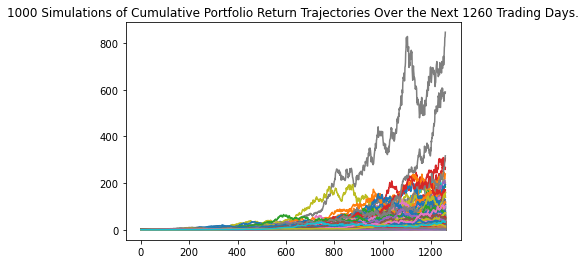

In [ ]:
plot = MC.plot_simulation()

simulated_returns_data = {
    'mean': list(MC.simulated_return.mean(axis=1)),
    'median': list(MC.simulated_return.median(axis=1)),
    'min': list(MC.simulated_return.min(axis=1)),
    'max': list(MC.simulated_return.max(axis=1)),
}


pd.options.display.float_format = '{:,.6f}'.format
df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

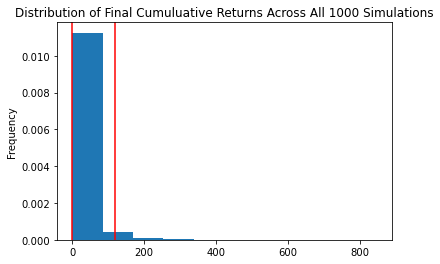

In [ ]:
dist_plot = MC.plot_distribution()